In [1]:
#引入代码需要用的包
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.compat.v1.disable_eager_execution()     #这句话为了兼容tensorflow 1.x版本

In [2]:
#定义神经网络输入的真实数据（理解为机器学习中的特征features）
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]

In [3]:
#定义神经网络数据输入的格式
xs = tf.compat.v1.placeholder(tf.float32, [None, 1])

In [4]:
#构建神经网络的隐藏层
def add_layer(inputs, in_size, out_size, activation_function=None):
    '''
    :param inputs: 输入值
    :param in_size: 输入值的大小
    :param out_size: 输出值的大小，也可以理解为该层神经元个数
    :param activation_function: 激活函数
    :return: outputs
    '''

    # 定义Weights为一个 in_size行 out_size列 的随机变量矩阵；weights就是权重
    Weights = tf.Variable(tf.compat.v1.random_normal([in_size, out_size]))
    # biases一般不推荐0, 所以在0的基础上加0.1；biases就是偏置
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    # 矩阵相乘；实现公式 wx+b。
    Wx_plus_b = tf.matmul(inputs, Weights) + biases

    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

#xs是输入数据的格式，1是输入数据的大小，10是该层里有10个神经元（或者是该层的输出个数）
hide_1 = add_layer(xs, 1, 10, activation_function=tf.nn.tanh)

In [5]:
#定义神经网络的输出的真实数据（理解为机器学习中的标签label）
noise = np.random.normal(0, 0.05, x_data.shape)  #数据不能过于完美，需要人为加入噪声
y_data = np.square(x_data) - 0.5 + noise

In [6]:
#定义神经网络数据输出的格式
ys = tf.compat.v1.placeholder(tf.float32, [None, 1])

In [7]:
#构建神经网络的输出层
def add_layer(inputs, in_size, out_size, activation_function=None):
    '''
    :param inputs: 输入值
    :param in_size: 输入值的大小
    :param out_size: 输出值的大小，也可以理解为该层神经元个数
    :param activation_function: 激活函数
    :return: outputs
    '''
    # 定义Weights为一个 in_size行 out_size列 的随机变量矩阵；weights就是权重
    Weights = tf.Variable(tf.compat.v1.random_normal([in_size, out_size]))
    # biases一般不推荐0, 所以在0的基础上加0.1；biases就是偏置
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    # 矩阵相乘；实现公式 wx+b。
    Wx_plus_b = tf.matmul(inputs, Weights) + biases

    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs
#hide_1就是隐藏层的结果，10就是hide_1的大小，1代表最后输出1个结果
prediction = add_layer(hide_1, 10, 1, activation_function=None)

In [8]:
#定义损失函数（损失函数就是真实值和预测值之间的均方差）
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), axis=[1]))

In [9]:
#计算损失函数的最小值
train_step = tf.compat.v1.train.GradientDescentOptimizer(0.1).minimize(loss)

In [10]:
#初始化tensorflow定义的参数和会话
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

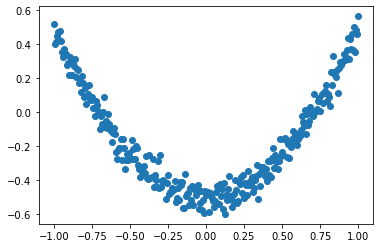

In [11]:
# 构建图形，画图初始化定义
fig = plt.figure()  # 生成图片框
ax = fig.add_subplot(1, 1, 1)  # 做一个连续性的画图需要用到add_subplot函数
ax.scatter(x_data, y_data)  # plot真实的数据
plt.ion()   #本次运行需注释，全局运行不需注释
plt.show()

In [12]:
# 开始训练网络，并在画图中查看结果
for i in range(1):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i % 50 == 0:
        print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))
        # 图形显示预测数据
        try:
            # 如果想连续plot出线，就需要把之前的线去除掉，否则太多的线看不清最后的结果
            ax.lines.remove(lines[0])
        except:
            pass
        # 定义预测数据
        prediction_value = sess.run(prediction, feed_dict={xs:x_data})
        # 用红色、宽度为5的线来显示我们的预测数据和输入之间的关系，并暂停0.1s
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)
plt.pause(10)

0.22416118
